In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import os
os.chdir('/content/drive/MyDrive/데싸 팀플/3차 점검')

In [ ]:
import matplotlib.font_manager as fm
# 나눔 폰트 업로드
!apt-get update -qq
!apt-get install fonts-nanum* -qq

# 폰트가 정상적으로 설치되었는지 확인
sys_font = fm.findSystemFonts()
print("sys_font number : {}".format(len(sys_font)))

nanum_font = [f for f in sys_font if 'Nanum' in f]
print("nanum_font number : {}".format(len(nanum_font)))

fe = fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumSquareB.ttf', name='NanumSquareB') #파일 저장되어있는 경로와 이름 설정
fm.fontManager.ttflist.insert(0, fe)  # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumSquareB'}) #폰트설정

sys_font number : 56
nanum_font number : 39


# 데이터 불러오기

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/데싸 팀플/train_fin2.csv', index_col = 0, dtype = {'jkNo':str, 'trNo':str})
test = pd.read_csv('/content/drive/MyDrive/데싸 팀플/test_fin2.csv', index_col = 0, dtype = {'jkNo':str, 'trNo':str})

In [ ]:
train.head()

,age,chulNo,rating,rcDist,wgBudam,wgHr,jkAge,jkCareer,rcDate,trCareer,...,meet_서울,meet_제주,prdName_외산,jeju_제주,jeju_한라,y_speed,y_ord,ordRate,jkordRate,trordRate
0,3,6,43,1600.0,55.0,506.0,33,12,20190104,19.0,...,0,0,0,0,0,15.779093,1,0.0,0.093458,0.258581
1,4,5,0,1300.0,56.5,465.0,33,12,20190104,19.0,...,0,0,0,0,0,15.476190,0,0.0,0.093458,0.215278
2,3,10,0,1300.0,55.0,536.0,27,8,20190104,19.0,...,0,0,0,0,0,15.494636,0,0.0,0.241814,0.258581
3,4,11,0,1300.0,56.5,514.0,40,14,20190104,19.0,...,0,0,0,0,0,15.550239,1,0.0,0.000000,0.215278
4,3,3,0,1300.0,56.0,464.0,36,15,20190104,19.0,...,0,0,0,0,0,15.587530,1,0.0,0.124579,0.158537


In [ ]:
test.head()

,age,chulNo,rating,rcDist,wgBudam,wgHr,jkAge,jkCareer,rcDate,trCareer,...,meet_제주,prdName_외산,jeju_제주,jeju_한라,unique_rcNo,y_speed,y_ord,ordRate,jkordRate,trordRate
0,4,8,63,1200.0,53.0,506.0,25,2,20220701,19.0,...,0,0,0,0,0,16.194332,1,0.125000,0.200820,0.187817
1,4,10,54,1200.0,52.5,462.0,35,14,20220701,9.0,...,0,0,0,0,0,16.282225,1,0.000000,0.212454,0.263598
2,4,7,58,1200.0,54.5,506.0,42,2,20220701,19.0,...,0,1,0,0,0,16.393443,1,0.500000,0.000000,0.327068
3,4,2,35,1600.0,53.0,490.0,25,2,20220701,19.0,...,0,0,0,0,1,15.094340,0,0.000000,0.200820,0.166667
4,3,3,30,1600.0,56.0,517.0,27,7,20220701,19.0,...,0,0,0,0,1,15.267176,0,0.166667,0.232877,0.150602


In [ ]:
train.shape

(81447, 26)

In [ ]:
test.shape

(25287, 27)

In [ ]:
train.columns

Index(['age', 'chulNo', 'rating', 'rcDist', 'wgBudam', 'wgHr', 'jkAge',
       'jkCareer', 'rcDate', 'trCareer', 'waterPercent', 'trTime_30',
       'recent_ill', 'wgHr_var', 'sex_수', 'sex_암', 'meet_서울', 'meet_제주',
       'prdName_외산', 'jeju_제주', 'jeju_한라', 'y_speed', 'y_ord', 'ordRate',
       'jkordRate', 'trordRate'],
      dtype='object')

# Linear Regression

In [ ]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

## Model1 (Full Model)

In [ ]:
train2 = train.drop(['rcDate', 'meet_서울', 'meet_제주'], axis = 1)
train2.columns

Index(['age', 'chulNo', 'rating', 'rcDist', 'wgBudam', 'wgHr', 'jkAge',
       'jkCareer', 'trCareer', 'waterPercent', 'trTime_30', 'recent_ill',
       'wgHr_var', 'sex_수', 'sex_암', 'prdName_외산', 'jeju_제주', 'jeju_한라',
       'y_speed', 'y_ord', 'ordRate', 'jkordRate', 'trordRate'],
      dtype='object')

In [ ]:
formula = 'y_speed ~ age + chulNo + rating + rcDist + wgBudam + wgHr + jkAge + jkCareer + trCareer + waterPercent + trTime_30 + recent_ill + wgHr_var + sex_수 + sex_암 + prdName_외산 + jeju_제주 + jeju_한라 + ordRate + jkordRate + trordRate'
model1 = smf.ols(formula=formula, data=train2)
results1 = model1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_speed   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                 1.152e+05
Date:                Mon, 11 Dec 2023   Prob (F-statistic):               0.00
Time:                        13:32:08   Log-Likelihood:                -19477.
No. Observations:               81447   AIC:                         3.900e+04
Df Residuals:                   81425   BIC:                         3.920e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       17.1867      0.038    446.960      0.000      17.111      17.262
age             -0.0145      0.001    -14.526      0.000      -0.016      -0.013
chulNo          -0.0025      0.000     -7.789      0.000      -0.003      -0.002
rating           0.0086    5.5e-05    156.830      0.000       0.009       0.009
rcDist          -0.0013   5.78e-06   -230.653      0.000      -0.001      -0.001
wgBudam         -0.0064      0.001    -11.042      0.000      -0.008      -0.005
wgHr             0.0005   4.65e-05     10.462      0.000       0.000       0.001
jkAge            0.0009      0.000      4.269      0.000       0.000       0.001
jkCareer        -0.0013      0.000     -6.553      0.000      -0.002      -0.001
trCareer        -0.0006      0.000     -3.984      0.000      -0.001      -0.000
waterPercent     0.0049      0.000     23.765      0.000       0.004       0.005
trTime_30     3.389e-06   2.38e-07     14.266      0.000    2.92e-06    3.85e-06
recent_ill       0.0124      0.001     16.412      0.000       0.011       0.014
wgHr_var        -0.0011      0.000     -7.164      0.000      -0.001      -0.001
sex_수            0.0058      0.003      2.024      0.043       0.000       0.011
sex_암           -0.0141      0.003     -4.839      0.000      -0.020      -0.008
prdName_외산      -0.0676      0.003    -19.468      0.000      -0.074      -0.061
jeju_제주         -4.5433      0.010   -445.883      0.000      -4.563      -4.523
jeju_한라         -1.9804      0.010   -203.659      0.000      -1.999      -1.961
ordRate          0.3124      0.010     29.763      0.000       0.292       0.333
jkordRate        0.3378      0.011     30.971      0.000       0.316       0.359
trordRate        0.1468      0.015      9.999      0.000       0.118       0.176
==============================================================================
Omnibus:                    47036.703   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2381928.157
Skew:                          -2.081   Prob(JB):                         0.00
Kurtosis:                      29.164   Cond. No.                     4.92e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.92e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Feature Selection

In [ ]:
import feature_selection as fsel

In [ ]:
X = train2.drop(['y_speed', 'y_ord'], axis = 1)
y = train2['y_speed']

In [ ]:
fsel.backwardSelection(X, y, model_type='linear', elimination_criteria='aic')

Character Variables (Dummies Generated, First Dummies Dropped): []
                            OLS Regression Results                            
Dep. Variable:                y_speed   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                 1.152e+05
Date:                Mon, 11 Dec 2023   Prob (F-statistic):               0.00
Time:                        13:32:09   Log-Likelihood:                -19477.
No. Observations:               81447   AIC:                         3.900e+04
Df Residuals:                   81425   BIC:                         3.920e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

['intercept',
 'age',
 'chulNo',
 'rating',
 'rcDist',
 'wgBudam',
 'wgHr',
 'jkAge',
 'jkCareer',
 'trCareer',
 'waterPercent',
 'trTime_30',
 'recent_ill',
 'wgHr_var',
 'sex_수',
 'sex_암',
 'prdName_외산',
 'jeju_제주',
 'jeju_한라',
 'ordRate',
 'jkordRate',
 'trordRate']

### VIF

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81447 entries, 0 to 81446
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           81447 non-null  int64  
 1   chulNo        81447 non-null  int64  
 2   rating        81447 non-null  int64  
 3   rcDist        81447 non-null  float64
 4   wgBudam       81447 non-null  float64
 5   wgHr          81447 non-null  float64
 6   jkAge         81447 non-null  int64  
 7   jkCareer      81447 non-null  int64  
 8   trCareer      81447 non-null  float64
 9   waterPercent  81447 non-null  int64  
 10  trTime_30     81447 non-null  float64
 11  recent_ill    81447 non-null  int64  
 12  wgHr_var      81447 non-null  float64
 13  sex_수         81447 non-null  int64  
 14  sex_암         81447 non-null  int64  
 15  prdName_외산    81447 non-null  int64  
 16  jeju_제주       81447 non-null  int64  
 17  jeju_한라       81447 non-null  int64  
 18  y_speed       81447 non-nu

y값(y_speed, y_ord) 제거 후 vif

In [ ]:
X = train2.drop(['y_speed', 'y_ord'], axis = 1)

In [ ]:
# VIF 계산
def calculate_vif(data_frame):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = data_frame.columns
    vif_data["VIF"] = [variance_inflation_factor(data_frame.values, i) for i in range(data_frame.shape[1])]
    return vif_data

# 독립변수들의 VIF 계산
vif_result = calculate_vif(X)
print(vif_result)

        Variable         VIF
0            age   15.496897
1         chulNo    4.354857
2         rating    4.990587
3         rcDist   47.574218
4        wgBudam  336.244113
5           wgHr  259.748200
6          jkAge   54.595915
7       jkCareer    8.966022
8       trCareer    6.805384
9   waterPercent    3.559842
10     trTime_30    8.905932
11    recent_ill    1.258807
12      wgHr_var    1.024486
13         sex_수    2.279606
14         sex_암    2.555992
15    prdName_외산    1.459372
16       jeju_제주   15.143543
17       jeju_한라    3.798956
18       ordRate    1.380830
19     jkordRate    3.874569
20     trordRate    6.361460


age, rcDist, wgBudam, wgHr, jkAge VIF 10 이상이므로 제거  
jeju_제주는 jeju_한라와 함께 있어야 말 종류가 구분되므로 냅둠.

In [ ]:
X2 = X.drop(['age', 'rcDist', 'wgBudam', 'wgHr', 'jkAge'], axis = 1)
X2

,chulNo,rating,jkCareer,trCareer,waterPercent,trTime_30,recent_ill,wgHr_var,sex_수,sex_암,prdName_외산,jeju_제주,jeju_한라,ordRate,jkordRate,trordRate
0,6,43,12,19.0,3,1380.0,0,-2.0,1,0,0,0,0,0.000000,0.093458,0.258581
1,5,0,12,19.0,3,660.0,0,5.0,1,0,0,0,0,0.000000,0.093458,0.215278
2,10,0,8,19.0,3,1320.0,0,-9.0,1,0,0,0,0,0.000000,0.241814,0.258581
3,11,0,14,19.0,3,1560.0,0,14.0,1,0,0,0,0,0.000000,0.000000,0.215278
4,3,0,15,19.0,3,1620.0,0,-3.0,1,0,0,0,0,0.000000,0.124579,0.158537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81442,11,36,14,19.0,11,12900.0,3,-1.0,1,0,0,0,0,0.000000,0.212454,0.258581
81443,1,37,18,19.0,11,8520.0,3,-7.0,0,1,0,0,0,0.363636,0.261111,0.150602
81444,6,37,2,19.0,11,13980.0,0,-4.0,1,0,0,0,0,0.000000,0.161215,0.158537
81445,9,40,7,16.0,11,10291.0,8,3.0,1,0,0,0,0,0.090909,0.232877,0.116883


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


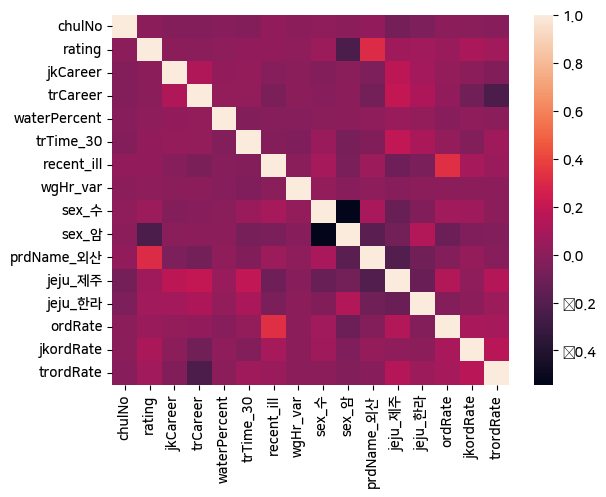

In [ ]:
sns.heatmap(X2.corr())

## Model2

In [ ]:
formula = 'y_speed ~ chulNo + rating + jkCareer + trCareer + waterPercent + trTime_30 + recent_ill + wgHr_var + sex_수 + sex_암 + prdName_외산 + jeju_제주 + jeju_한라 + ordRate + jkordRate + trordRate'
model2 = smf.ols(formula=formula, data=train2)
results2 = model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_speed   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 8.763e+04
Date:                Mon, 11 Dec 2023   Prob (F-statistic):               0.00
Time:                        13:32:22   Log-Likelihood:                -40752.
No. Observations:               81447   AIC:                         8.154e+04
Df Residuals:                   81430   BIC:                         8.170e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       15.3243      0.008   1836.528      0.000      15.308      15.341
chulNo          -0.0016      0.000     -3.937      0.000      -0.002      -0.001
rating           0.0028   5.27e-05     53.221      0.000       0.003       0.003
jkCareer        -0.0003      0.000     -1.910      0.056      -0.001    8.33e-06
trCareer      9.384e-05      0.000      0.484      0.628      -0.000       0.000
waterPercent     0.0054      0.000     20.414      0.000       0.005       0.006
trTime_30     3.168e-06   2.99e-07     10.601      0.000    2.58e-06    3.75e-06
recent_ill       0.0084      0.001      8.544      0.000       0.006       0.010
wgHr_var        -0.0002      0.000     -1.235      0.217      -0.001       0.000
sex_수            0.0174      0.004      4.752      0.000       0.010       0.025
sex_암            0.0518      0.004     14.209      0.000       0.045       0.059
prdName_외산      -0.0210      0.004     -4.723      0.000      -0.030      -0.012
jeju_제주         -4.0792      0.004  -1009.924      0.000      -4.087      -4.071
jeju_한라         -1.8418      0.007   -275.518      0.000      -1.855      -1.829
ordRate          0.3756      0.014     27.722      0.000       0.349       0.402
jkordRate        0.3823      0.014     27.340      0.000       0.355       0.410
trordRate        0.2747      0.019     14.466      0.000       0.237       0.312
==============================================================================
Omnibus:                    23039.315   Durbin-Watson:                   0.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           249432.093
Skew:                          -1.050   Prob(JB):                         0.00
Kurtosis:                      11.312   Cond. No.                     1.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Feature Selection

In [ ]:
X = X2
y = train2['y_speed']

In [ ]:
fsel.backwardSelection(X, y, model_type='linear', elimination_criteria='aic')

Character Variables (Dummies Generated, First Dummies Dropped): []
Eliminated : trCareer
Eliminated : wgHr_var
Eliminated : jkCareer
Regained :  jkCareer
                            OLS Regression Results                            
Dep. Variable:                y_speed   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 1.002e+05
Date:                Mon, 11 Dec 2023   Prob (F-statistic):               0.00
Time:                        13:32:23   Log-Likelihood:                -40753.
No. Observations:               81447   AIC:                         8.154e+04
Df Residuals:                   81432   BIC:                         8.167e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|

['intercept',
 'chulNo',
 'rating',
 'jkCareer',
 'waterPercent',
 'trTime_30',
 'recent_ill',
 'sex_수',
 'sex_암',
 'prdName_외산',
 'jeju_제주',
 'jeju_한라',
 'ordRate',
 'jkordRate',
 'trordRate']

## Model3

In [ ]:
formula = 'y_speed ~ chulNo + rating + jkCareer + waterPercent + trTime_30 + recent_ill + sex_수 + sex_암 + prdName_외산 + jeju_제주 + jeju_한라 + ordRate + jkordRate + trordRate'
model3 = smf.ols(formula=formula, data=train2)
results3 = model3.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_speed   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 1.002e+05
Date:                Mon, 11 Dec 2023   Prob (F-statistic):               0.00
Time:                        13:32:23   Log-Likelihood:                -40753.
No. Observations:               81447   AIC:                         8.154e+04
Df Residuals:                   81432   BIC:                         8.167e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       15.3260      0.007   2094.342      0.000      15.312      15.340
chulNo          -0.0016      0.000     -3.938      0.000      -0.002      -0.001
rating           0.0028   5.27e-05     53.213      0.000       0.003       0.003
jkCareer        -0.0003      0.000     -1.880      0.060      -0.001    1.35e-05
waterPercent     0.0055      0.000     20.451      0.000       0.005       0.006
trTime_30     3.182e-06   2.98e-07     10.666      0.000     2.6e-06    3.77e-06
recent_ill       0.0084      0.001      8.552      0.000       0.006       0.010
sex_수            0.0174      0.004      4.737      0.000       0.010       0.025
sex_암            0.0518      0.004     14.208      0.000       0.045       0.059
prdName_외산      -0.0211      0.004     -4.734      0.000      -0.030      -0.012
jeju_제주         -4.0788      0.004  -1037.147      0.000      -4.087      -4.071
jeju_한라         -1.8414      0.007   -279.116      0.000      -1.854      -1.828
ordRate          0.3757      0.014     27.738      0.000       0.349       0.402
jkordRate        0.3818      0.014     27.360      0.000       0.354       0.409
trordRate        0.2722      0.018     14.884      0.000       0.236       0.308
==============================================================================
Omnibus:                    23044.350   Durbin-Watson:                   0.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           249540.521
Skew:                          -1.050   Prob(JB):                         0.00
Kurtosis:                      11.314   Cond. No.                     1.82e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.82e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


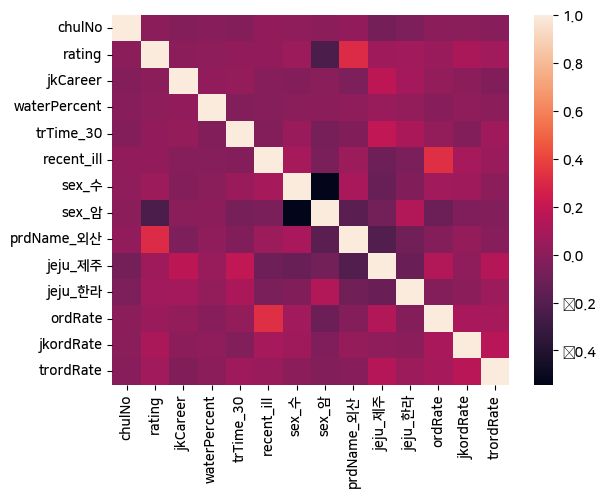

In [ ]:
X3 = train2[['chulNo', 'rating', 'jkCareer', 'waterPercent', 'trTime_30', 'recent_ill', 'sex_수', 'sex_암', 'prdName_외산', 'jeju_제주', 'jeju_한라', 'ordRate', 'jkordRate', 'trordRate']]
sns.heatmap(X3.corr());

In [ ]:
# VIF 계산
def calculate_vif(data_frame):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = data_frame.columns
    vif_data["VIF"] = [variance_inflation_factor(data_frame.values, i) for i in range(data_frame.shape[1])]
    return vif_data

# 독립변수들의 VIF 계산
vif_result = calculate_vif(X3)
print(vif_result)

        Variable       VIF
0         chulNo  3.787234
1         rating  2.658026
2       jkCareer  3.312280
3   waterPercent  3.200971
4      trTime_30  6.191925
5     recent_ill  1.252443
6          sex_수  2.066692
7          sex_암  2.250715
8     prdName_외산  1.425365
9        jeju_제주  1.686643
10       jeju_한라  1.175025
11       ordRate  1.364310
12     jkordRate  3.569062
13     trordRate  5.171724


### 표준화 회귀계수

In [ ]:
x_dec = X3.describe()
x_dec.loc['std']

chulNo             3.384349
rating            29.275131
jkCareer           8.540977
waterPercent       5.262578
trTime_30       4848.129988
recent_ill         1.541008
sex_수              0.467279
sex_암              0.485892
prdName_외산         0.347935
jeju_제주            0.409824
jeju_한라            0.224849
ordRate            0.112209
jkordRate          0.102865
trordRate          0.079176
Name: std, dtype: float64

In [ ]:
y.describe()['std']

1.7034271655988595

In [ ]:
sx_sy = x_dec.loc['std']/y.describe()['std']

In [ ]:
results3.params[1:]/sx_sy

chulNo         -8.239332e-04
rating          1.632448e-04
jkCareer       -6.294845e-05
waterPercent    1.766044e-03
trTime_30       1.118178e-09
recent_ill      9.282982e-03
sex_수           6.332374e-02
sex_암           1.817051e-01
prdName_외산     -1.032285e-01
jeju_제주        -1.695348e+01
jeju_한라        -1.395013e+01
ordRate         5.704118e+00
jkordRate       6.323135e+00
trordRate       5.856015e+00
dtype: float64

## Linear Regression Test

In [ ]:
test.head()

,age,chulNo,rating,rcDist,wgBudam,wgHr,jkAge,jkCareer,rcDate,trCareer,...,meet_제주,prdName_외산,jeju_제주,jeju_한라,unique_rcNo,y_speed,y_ord,ordRate,jkordRate,trordRate
0,4,8,63,1200.0,53.0,506.0,25,2,20220701,19.0,...,0,0,0,0,0,16.194332,1,0.125000,0.200820,0.187817
1,4,10,54,1200.0,52.5,462.0,35,14,20220701,9.0,...,0,0,0,0,0,16.282225,1,0.000000,0.212454,0.263598
2,4,7,58,1200.0,54.5,506.0,42,2,20220701,19.0,...,0,1,0,0,0,16.393443,1,0.500000,0.000000,0.327068
3,4,2,35,1600.0,53.0,490.0,25,2,20220701,19.0,...,0,0,0,0,1,15.094340,0,0.000000,0.200820,0.166667
4,3,3,30,1600.0,56.0,517.0,27,7,20220701,19.0,...,0,0,0,0,1,15.267176,0,0.166667,0.232877,0.150602


In [ ]:
test.columns

Index(['age', 'chulNo', 'rating', 'rcDist', 'wgBudam', 'wgHr', 'jkAge',
       'jkCareer', 'rcDate', 'trCareer', 'waterPercent', 'trTime_30',
       'recent_ill', 'wgHr_var', 'sex_수', 'sex_암', 'meet_서울', 'meet_제주',
       'prdName_외산', 'jeju_제주', 'jeju_한라', 'unique_rcNo', 'y_speed', 'y_ord',
       'ordRate', 'jkordRate', 'trordRate'],
      dtype='object')

In [ ]:
X_test = test.drop(['y_speed', 'y_ord'], axis=1)
y_test = test['y_speed']

In [ ]:
pred1 = results1.predict(X_test)
pred2 = results2.predict(X_test)
pred3 = results3.predict(X_test)

In [ ]:
# Predictive R^2
from sklearn.metrics import r2_score as r2
print('model1:',r2(y_test, pred1))
print('model2:',r2(y_test, pred2))
print('model3:',r2(y_test, pred3))

model1: 0.9759585967418997
model2: 0.9589244202401552
model3: 0.9589121196708086


In [ ]:
from sklearn.metrics import mean_absolute_error as mae
print('model1:',mae(y_test, pred1))
print('model2:',mae(y_test, pred2))
print('model3:',mae(y_test, pred3))

model1: 0.2056884592606363
model2: 0.27463466806183934
model3: 0.27468036539450097


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error as mape
print('model1:',mape(y_test, pred1))
print('model2:',mape(y_test, pred2))
print('model3:',mape(y_test, pred3))

model1: 0.014473724457260589
model2: 0.019101198758550743
model3: 0.019104562698046074


In [ ]:
from sklearn.metrics import mean_squared_error as mse
print('model1:',mse(y_test, pred1))
print('model2:',mse(y_test, pred2))
print('model3:',mse(y_test, pred3))

model1: 0.07769560510916641
model2: 0.1327456634036405
model3: 0.1327854156663648


## 5마리 말 예측 test

In [ ]:
# 경기별 예측 성공 여부를 넣을 list
model1_pred = []
model2_pred = []
model3_pred = []

# 각 경기별로 5마리 말 선택 후, 선택된 말이 순위권에 모두 있는지 확인
for i in range(2415): # unique한 경기 2415개
  # 같은 경기에 출전한 말 추출
  new_test = test[test['unique_rcNo']==i]

  # X, y로 분리 (y는 y_ord 이용)
  X_test = new_test.drop(['y_speed'], axis=1)
  y_test = new_test['y_ord']

  # Predict: 본인이 만든 모델로 수정
  pred1 = results1.predict(X_test)
  pred2 = results2.predict(X_test)
  pred3 = results3.predict(X_test)

  # 5마리 말 선택
  horse5_model1 = pred1.rank(method='min', ascending=False) <= 5
  horse5_model2 = pred2.rank(method='min', ascending=False) <= 5
  horse5_model3 = pred3.rank(method='min', ascending=False) <= 5

  # 5마리 말이 순위권에 있는지 계산 (순위권 말이 모두 예측말일 경우 성공, 아니면 실패)
  true_horse = y_test[y_test==1].index # 실제로 순위권에 든 말의 index

  # 실제로 순위권에 든 말을 모두 예측했는지 확인
  if sum(horse5_model1[true_horse]) == len(horse5_model1[true_horse]):
    result1 = 1
  else:
    result1 = 0

  if sum(horse5_model2[true_horse]) == len(horse5_model2[true_horse]):
    result2 = 1
  else:
    result2 = 0

  if sum(horse5_model3[true_horse]) == len(horse5_model3[true_horse]):
    result3 = 1
  else:
    result3 = 0

  # 예측 결과를 list에 추가
  model1_pred.append(result1)
  model2_pred.append(result2)
  model3_pred.append(result3)

# 예측 성공률 계산
model1_acc = sum(model1_pred) / len(model1_pred)
model2_acc = sum(model2_pred) / len(model2_pred)
model3_acc = sum(model3_pred) / len(model3_pred)

print('model1의 예측 성공률: ', model1_acc)
print('model2의 예측 성공률: ', model2_acc)
print('model3의 예측 성공률: ', model3_acc)

model1의 예측 성공률:  0.3424430641821946
model2의 예측 성공률:  0.3581780538302277
model3의 예측 성공률:  0.356935817805383


model2의 성능이 제일 좋음. 과적합방지를 위해 ridge, lasso regression 시도

## Regression Expanding

In [ ]:
test2 = test.copy()

In [ ]:
test2['rcDate'] = pd.to_datetime(test2['rcDate'], format='%Y%m%d')

In [ ]:
test2['rcDate']

0       2022-07-01
1       2022-07-01
2       2022-07-01
3       2022-07-01
4       2022-07-01
           ...    
25282   2023-06-30
25283   2023-06-30
25284   2023-06-30
25285   2023-06-30
25286   2023-06-30
Name: rcDate, Length: 25287, dtype: datetime64[ns]

In [ ]:
years = list(test2['rcDate'].dt.year.unique())
years

[2022, 2023]

In [ ]:
months = list(test2['rcDate'].dt.month.unique())
months

[7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6]

In [ ]:
test2['rcDate'].head()

0   2022-07-01
1   2022-07-01
2   2022-07-01
3   2022-07-01
4   2022-07-01
Name: rcDate, dtype: datetime64[ns]

In [ ]:
test2['rcDate'].tail()

25282   2023-06-30
25283   2023-06-30
25284   2023-06-30
25285   2023-06-30
25286   2023-06-30
Name: rcDate, dtype: datetime64[ns]

In [ ]:
r_train = train2[['chulNo', 'rating', 'jkCareer', 'waterPercent', 'trTime_30', 'recent_ill', 'sex_수', 'sex_암', 'prdName_외산', 'jeju_제주', 'jeju_한라', 'ordRate', 'jkordRate', 'trordRate', 'y_speed']]

In [ ]:
for i in years:
  for j in months:

    if (((i == 2022) & (j < 7)) | ((i == 2023) & (j >= 7))):
      pass
    else:
      # fitting
      formula = 'y_speed ~ chulNo + rating + jkCareer + waterPercent + trTime_30 + recent_ill + sex_수 + sex_암 + prdName_외산 + jeju_제주 + jeju_한라 + ordRate + jkordRate + trordRate'
      model = smf.ols(formula = formula, data = r_train)
      results = model.fit()
      print(i, '년', j, '월을 test시킨 r2: ', results.rsquared)

      r_test = test2[(test2['rcDate'].dt.year == i) & (test2['rcDate'].dt.month == j)]

      # RF regressor 전체
      # 경기별 예측 성공 여부를 넣을 list
      result_list= []

      # 각 경기별로 5마리 말 선택 후, 선택된 말이 순위권에 모두 있는지 확인
      # test: without jeju
      unique_rc = list(r_test['unique_rcNo'].unique())
      for rc in unique_rc:
          new_test = r_test[r_test['unique_rcNo']==rc]
          new_test.reset_index(inplace=True)

          X_cols = ['chulNo', 'rating', 'jkCareer', 'waterPercent', 'trTime_30', 'recent_ill', 'sex_수', 'sex_암', 'prdName_외산', 'jeju_제주', 'jeju_한라', 'ordRate', 'jkordRate', 'trordRate']
          X_test_rc = new_test[X_cols]
          y_test_rc = new_test['y_ord']

          pred = results.predict(X_test_rc)
          pred = pd.DataFrame(pred)
          horse5_model = pred.rank(method='min', ascending=False) <= 5
          true_horse = y_test_rc[y_test_rc==1].index # 실제로 순위권에 든 말의 index
          if sum(horse5_model.iloc[true_horse,0]) == len(horse5_model.iloc[true_horse]):
              result = 1
          else:
              result = 0

          # 예측 결과를 list에 추가
          result_list.append(result)

      # 예측 성공률 계산
      accuracy = sum(result_list) / len(result_list)

      print('accuracy: ', accuracy)

      c_test = r_test[['chulNo', 'rating', 'jkCareer', 'waterPercent', 'trTime_30', 'recent_ill', 'sex_수', 'sex_암', 'prdName_외산', 'jeju_제주', 'jeju_한라', 'ordRate', 'jkordRate', 'trordRate', 'y_speed']]
      r_train = pd.concat([r_train, c_test], ignore_index=True)


2022 년 7 월을 test시킨 r2:  0.9451106575863617
accuracy:  0.2627118644067797
2022 년 8 월을 test시킨 r2:  0.9452148441279834
accuracy:  0.25806451612903225
2022 년 9 월을 test시킨 r2:  0.9457547428226737
accuracy:  0.29878048780487804
2022 년 10 월을 test시킨 r2:  0.946227480641249
accuracy:  0.39316239316239315
2022 년 11 월을 test시킨 r2:  0.9468326371449007
accuracy:  0.40298507462686567
2022 년 12 월을 test시킨 r2:  0.9473463354341145
accuracy:  0.4020100502512563
2023 년 1 월을 test시킨 r2:  0.9474630206610501
accuracy:  0.38666666666666666
2023 년 2 월을 test시킨 r2:  0.9472621390976932
accuracy:  0.3106796116504854
2023 년 3 월을 test시킨 r2:  0.9474127184891825
accuracy:  0.36018957345971564
2023 년 4 월을 test시킨 r2:  0.9478348533848242
accuracy:  0.4713656387665198
2023 년 5 월을 test시킨 r2:  0.9479674531290518
accuracy:  0.42473118279569894
2023 년 6 월을 test시킨 r2:  0.9483393968611449
accuracy:  0.3302325581395349


비선형 회귀 시도를 해보기 위해 랜포, 인공신경망 적합시킴

## Ridge

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
X_train = train[['chulNo', 'rating', 'jkCareer', 'waterPercent', 'trTime_30', 'recent_ill', 'sex_수', 'sex_암', 'prdName_외산', 'jeju_제주', 'jeju_한라', 'ordRate', 'jkordRate', 'trordRate']]
y_train = train['y_speed']

In [ ]:
ridge1 = Ridge().fit(X_train, y_train)

In [ ]:
pd.DataFrame(np.round(ridge1.coef_, 4), ridge1.feature_names_in_)

,0
chulNo,-0.0016
rating,0.0028
jkCareer,-0.0003
waterPercent,0.0055
trTime_30,0.0000
recent_ill,0.0084
sex_수,0.0174
sex_암,0.0518
prdName_외산,-0.0209
jeju_제주,-4.0783


In [ ]:
X_test = test[['chulNo', 'rating', 'jkCareer', 'waterPercent', 'trTime_30', 'recent_ill', 'sex_수', 'sex_암', 'prdName_외산', 'jeju_제주', 'jeju_한라', 'ordRate', 'jkordRate', 'trordRate']]
y_test = test['y_speed']
ridge1.score(X_test,y_test)

0.959637734145177

In [ ]:
unique_rc = list(test['unique_rcNo'].unique())
result_list = []

for rc in unique_rc:
    new_test = test[test['unique_rcNo']==rc]
    new_test.reset_index(inplace=True)

    X_test_rc = new_test[['chulNo', 'rating', 'jkCareer', 'waterPercent', 'trTime_30', 'recent_ill', 'sex_수', 'sex_암', 'prdName_외산', 'jeju_제주', 'jeju_한라', 'ordRate', 'jkordRate', 'trordRate']]
    y_test_rc = new_test['y_ord']

    pred = ridge1.predict(X_test_rc)
    pred = pd.DataFrame(pred)
    horse5_model = pred.rank(method='min', ascending=False) <= 5
    true_horse = y_test_rc[y_test_rc==1].index # 실제로 순위권에 든 말의 index

    if sum(horse5_model.iloc[true_horse,0]) == len(horse5_model.iloc[true_horse]):
        result = 1
    else:
        result = 0

    # 예측 결과를 list에 추가
    result_list.append(result)

# 예측 성공률 계산
accuracy = sum(result_list) / len(result_list)

print('Ridge Regression Model의 예측 성공률: ', accuracy)

Ridge Regression Model의 예측 성공률:  0.356935817805383


### Rolling

In [ ]:
## Rolling
from sklearn.linear_model import Ridge
r_train = train.copy()

prev_month = [20190201,20190301,20190401,20190501,20190601,20190701,20190801,20190901,20191001,20191101,20191201,20200101]
month_list = [20220701,20220801,20220901,20221001,20221101,20221201,20230101,20230201,20230301,20230401,20230501,20230601]
rsquareds = []
accuracies = []
for i in range(len(month_list)-1):
    X_train = r_train[['chulNo', 'rating', 'jkCareer', 'waterPercent', 'trTime_30', 'recent_ill', 'sex_수', 'sex_암', 'prdName_외산', 'jeju_제주', 'jeju_한라', 'ordRate', 'jkordRate', 'trordRate']]
    y_train = r_train['y_speed']
    ridge1 = Ridge().fit(X_train, y_train)

    #   r_test = test[(test['rcDate'].dt.year == i) & (test['rcDate'].dt.month == j)]
    r_test = test[(test['rcDate']>=month_list[i]) & (test['rcDate']<month_list[i+1])]

    # RF regressor 전체
    # 경기별 예측 성공 여부를 넣을 list
    result_list= []

    # 각 경기별로 5마리 말 선택 후, 선택된 말이 순위권에 모두 있는지 확인
    unique_rc = list(r_test['unique_rcNo'].unique())
    for rc in unique_rc:
        new_test = r_test[r_test['unique_rcNo']==rc]
        new_test.reset_index(inplace=True)

        X_cols = ['chulNo', 'rating', 'jkCareer', 'waterPercent', 'trTime_30', 'recent_ill', 'sex_수', 'sex_암', 'prdName_외산', 'jeju_제주', 'jeju_한라', 'ordRate', 'jkordRate', 'trordRate']
        X_test_rc = new_test[X_cols]
        # X_test_rc = new_test
        y_test_rc = new_test['y_ord']

        pred = ridge1.predict(X_test_rc)
        pred = pd.DataFrame(pred)
        horse5_model = pred.rank(method='min', ascending=False) <= 5
        true_horse = y_test_rc[y_test_rc==1].index # 실제로 순위권에 든 말의 index
        if sum(horse5_model.iloc[true_horse,0]) == len(horse5_model.iloc[true_horse]):
            result = 1
        else:
            result = 0

          # 예측 결과를 list에 추가
        result_list.append(result)

      # 예측 성공률 계산
    accuracy = sum(result_list) / len(result_list)
    accuracies.append(accuracy)
    print(accuracy)

    r_train = pd.concat([r_train, r_test], ignore_index=True)
    r_train = r_train[r_train['rcDate']>=prev_month[i]]


0.2627118644067797
0.25268817204301075
0.2865853658536585
0.39316239316239315
0.39303482587064675
0.39195979899497485
0.38
0.3106796116504854
0.35545023696682465
0.46255506607929514
0.42473118279569894


### Expanding

In [ ]:
## Expanding
r_train = train.copy()

month_list = [20220701,20220801,20220901,20221001,20221101,20221201,20230101,20230201,20230301,20230401,20230501,20230601]
rsquareds = []
accuracies = []
for i in range(len(month_list)-1):

    # fitting
    formula = 'y_speed ~ chulNo + rating + jkCareer + trCareer + waterPercent + recent_ill + wgHr_var + sex_수 + sex_암 + prdName_외산 + jeju_제주 + jeju_한라 + ordRate + jkordRate + trordRate'
    ridge1 = Ridge().fit(X_train, y_train)

    #   r_test = test[(test['rcDate'].dt.year == i) & (test['rcDate'].dt.month == j)]
    r_test = test[(test['rcDate']>=month_list[i]) & (test['rcDate']<month_list[i+1])]

    # 경기별 예측 성공 여부를 넣을 list
    result_list= []

    # 각 경기별로 5마리 말 선택 후, 선택된 말이 순위권에 모두 있는지 확인
    unique_rc = list(r_test['unique_rcNo'].unique())
    for rc in unique_rc:
        new_test = r_test[r_test['unique_rcNo']==rc]
        new_test.reset_index(inplace=True)

        X_cols = ['chulNo', 'rating', 'jkCareer', 'waterPercent', 'trTime_30', 'recent_ill', 'sex_수', 'sex_암', 'prdName_외산', 'jeju_제주', 'jeju_한라', 'ordRate', 'jkordRate', 'trordRate']
        X_test_rc = new_test[X_cols]
        # X_test_rc = new_test
        y_test_rc = new_test['y_ord']

        pred = ridge1.predict(X_test_rc)
        pred = pd.DataFrame(pred)
        horse5_model = pred.rank(method='min', ascending=False) <= 5
        true_horse = y_test_rc[y_test_rc==1].index # 실제로 순위권에 든 말의 index
        if sum(horse5_model.iloc[true_horse,0]) == len(horse5_model.iloc[true_horse]):
            result = 1
        else:
            result = 0

          # 예측 결과를 list에 추가
        result_list.append(result)

      # 예측 성공률 계산
    accuracy = sum(result_list) / len(result_list)
    accuracies.append(accuracy)
    print(accuracy)

    r_train = pd.concat([r_train, r_test], ignore_index=True)



0.2669491525423729
0.26344086021505375
0.2865853658536585
0.3888888888888889
0.3880597014925373
0.3969849246231156
0.36666666666666664
0.3058252427184466
0.35545023696682465
0.4581497797356828
0.42473118279569894


### 표준화 회귀계수

In [ ]:
x_dec = X_train.describe()
x_dec.loc['std']

chulNo             3.379876
rating            29.401231
jkCareer           8.622292
waterPercent       5.338787
trTime_30       4573.139002
recent_ill         2.135697
sex_수              0.466786
sex_암              0.487453
prdName_외산         0.320354
jeju_제주            0.417488
jeju_한라            0.197694
ordRate            0.154805
jkordRate          0.094605
trordRate          0.071346
Name: std, dtype: float64

In [ ]:
y_train.describe()['std']

1.7193558266636326

In [ ]:
sx_sy = x_dec.loc['std']/y_train.describe()['std']

In [ ]:
ridge_coef = pd.DataFrame(np.round(ridge1.coef_, 4), ridge1.feature_names_in_)
ridge_coef['adj_coef'] = ridge_coef[0]/sx_sy

In [ ]:
ridge_coef

,0,adj_coef
chulNo,-0.0014,-0.000712
rating,0.0026,0.000152
jkCareer,-0.0002,-0.000040
waterPercent,0.0063,0.002029
trTime_30,0.0000,0.000000
recent_ill,0.0047,0.003784
sex_수,0.0194,0.071458
sex_암,0.0536,0.189059
prdName_외산,-0.0252,-0.135250
jeju_제주,-4.0582,-16.713016


## Lasso

In [ ]:
from sklearn.linear_model import Lasso
lasso1 = Lasso(alpha = 0.001)
lasso1.fit(X_train,y_train)

Lasso(alpha=0.001)

In [ ]:
lasso_coef = pd.DataFrame()
lasso_coef['variables'] = X_train.columns
lasso_coef['coefficients'] = lasso1.coef_
lasso_coef

,variables,coefficients
0,chulNo,-0.001353
1,rating,0.002666
2,jkCareer,-0.000423
3,waterPercent,0.005943
4,trTime_30,0.000002
5,recent_ill,0.006552
6,sex_수,0.011045
7,sex_암,0.041985
8,prdName_외산,-0.007238
9,jeju_제주,-4.050815


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


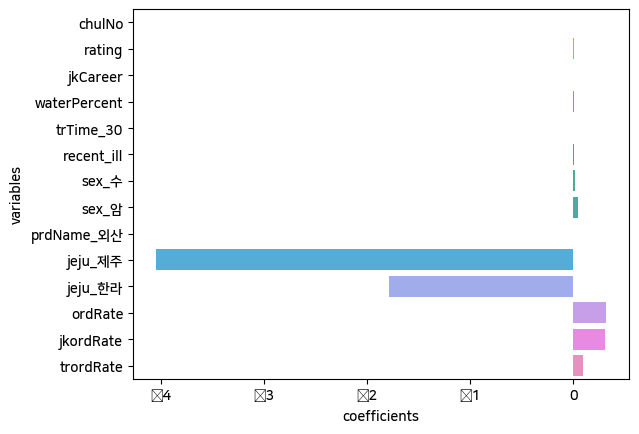

In [ ]:
sns.barplot(x='coefficients',y='variables',data=lasso_coef)
plt.show()

In [ ]:
X_test = test[['chulNo', 'rating', 'jkCareer', 'waterPercent', 'trTime_30', 'recent_ill', 'sex_수', 'sex_암', 'prdName_외산', 'jeju_제주', 'jeju_한라', 'ordRate', 'jkordRate', 'trordRate']]
y_test = test['y_speed']
lasso1.score(X_test,y_test)

0.959637374097111

In [ ]:
unique_rc = list(test['unique_rcNo'].unique())
result_list = []

for rc in unique_rc:
    new_test = test[test['unique_rcNo']==rc]
    new_test.reset_index(inplace=True)

    X_test_rc = new_test[['chulNo', 'rating', 'jkCareer', 'waterPercent', 'trTime_30', 'recent_ill', 'sex_수', 'sex_암', 'prdName_외산', 'jeju_제주', 'jeju_한라', 'ordRate', 'jkordRate', 'trordRate']]
    y_test_rc = new_test['y_ord']

    pred = lasso1.predict(X_test_rc)
    pred = pd.DataFrame(pred)
    horse5_model = pred.rank(method='min', ascending=False) <= 5
    true_horse = y_test_rc[y_test_rc==1].index # 실제로 순위권에 든 말의 index

    if sum(horse5_model.iloc[true_horse,0]) == len(horse5_model.iloc[true_horse]):
        result = 1
    else:
        result = 0

    # 예측 결과를 list에 추가
    result_list.append(result)

# 예측 성공률 계산
accuracy = sum(result_list) / len(result_list)

print('Lasso Regression Model의 예측 성공률: ', accuracy)

Lasso Regression Model의 예측 성공률:  0.36314699792960664


### Rolling

In [ ]:
## Rolling
r_train = train.copy()

prev_month = [20190201,20190301,20190401,20190501,20190601,20190701,20190801,20190901,20191001,20191101,20191201,20200101]
month_list = [20220701,20220801,20220901,20221001,20221101,20221201,20230101,20230201,20230301,20230401,20230501,20230601]
rsquareds = []
accuracies = []
for i in range(len(month_list)-1):
    X_train = r_train[['chulNo', 'rating', 'jkCareer', 'waterPercent', 'trTime_30', 'recent_ill', 'sex_수', 'sex_암', 'prdName_외산', 'jeju_제주', 'jeju_한라', 'ordRate', 'jkordRate', 'trordRate']]
    y_train = r_train['y_speed']
    lasso1 = Lasso(alpha=0.001).fit(X_train, y_train)

    #   r_test = test[(test['rcDate'].dt.year == i) & (test['rcDate'].dt.month == j)]
    r_test = test[(test['rcDate']>=month_list[i]) & (test['rcDate']<month_list[i+1])]

    # 경기별 예측 성공 여부를 넣을 list
    result_list= []

    # 각 경기별로 5마리 말 선택 후, 선택된 말이 순위권에 모두 있는지 확인
    unique_rc = list(r_test['unique_rcNo'].unique())
    for rc in unique_rc:
        new_test = r_test[r_test['unique_rcNo']==rc]
        new_test.reset_index(inplace=True)

        X_cols = ['chulNo', 'rating', 'jkCareer', 'waterPercent', 'trTime_30', 'recent_ill', 'sex_수', 'sex_암', 'prdName_외산', 'jeju_제주', 'jeju_한라', 'ordRate', 'jkordRate', 'trordRate']
        X_test_rc = new_test[X_cols]
        # X_test_rc = new_test
        y_test_rc = new_test['y_ord']

        pred = lasso1.predict(X_test_rc)
        pred = pd.DataFrame(pred)
        horse5_model = pred.rank(method='min', ascending=False) <= 5
        true_horse = y_test_rc[y_test_rc==1].index # 실제로 순위권에 든 말의 index
        if sum(horse5_model.iloc[true_horse,0]) == len(horse5_model.iloc[true_horse]):
            result = 1
        else:
            result = 0

          # 예측 결과를 list에 추가
        result_list.append(result)

      # 예측 성공률 계산
    accuracy = sum(result_list) / len(result_list)
    accuracies.append(accuracy)
    print(accuracy)

    r_train = pd.concat([r_train, r_test], ignore_index=True)
    r_train = r_train[r_train['rcDate']>=prev_month[i]]


0.2838983050847458
0.1935483870967742
0.29878048780487804
0.3888888888888889
0.373134328358209
0.41708542713567837
0.38666666666666666
0.32524271844660196
0.35071090047393366
0.45374449339207046
0.44623655913978494


### Expanding

In [ ]:
## Expanding
r_train = train.copy()

month_list = [20220701,20220801,20220901,20221001,20221101,20221201,20230101,20230201,20230301,20230401,20230501,20230601]
rsquareds = []
accuracies = []
for i in range(len(month_list)-1):

    # fitting
    # formula = 'y_speed ~ chulNo + rating + jkCareer + trCareer + waterPercent + recent_ill + wgHr_var + sex_수 + sex_암 + prdName_외산 + jeju_제주 + jeju_한라 + ordRate + jkordRate + trordRate'
    lasso1 = Lasso(alpha=0.001).fit(X_train, y_train)

    #   r_test = test[(test['rcDate'].dt.year == i) & (test['rcDate'].dt.month == j)]
    r_test = test[(test['rcDate']>=month_list[i]) & (test['rcDate']<month_list[i+1])]

    # 경기별 예측 성공 여부를 넣을 list
    result_list= []

    # 각 경기별로 5마리 말 선택 후, 선택된 말이 순위권에 모두 있는지 확인
    unique_rc = list(r_test['unique_rcNo'].unique())
    for rc in unique_rc:
        new_test = r_test[r_test['unique_rcNo']==rc]
        new_test.reset_index(inplace=True)

        X_cols = ['chulNo', 'rating', 'jkCareer', 'waterPercent', 'trTime_30', 'recent_ill', 'sex_수', 'sex_암', 'prdName_외산', 'jeju_제주', 'jeju_한라', 'ordRate', 'jkordRate', 'trordRate']
        X_test_rc = new_test[X_cols]
        # X_test_rc = new_test
        y_test_rc = new_test['y_ord']

        pred = lasso1.predict(X_test_rc)
        pred = pd.DataFrame(pred)
        horse5_model = pred.rank(method='min', ascending=False) <= 5
        true_horse = y_test_rc[y_test_rc==1].index # 실제로 순위권에 든 말의 index
        if sum(horse5_model.iloc[true_horse,0]) == len(horse5_model.iloc[true_horse]):
            result = 1
        else:
            result = 0

          # 예측 결과를 list에 추가
        result_list.append(result)

      # 예측 성공률 계산
    accuracy = sum(result_list) / len(result_list)
    accuracies.append(accuracy)
    print(accuracy)

    r_train = pd.concat([r_train, r_test], ignore_index=True)

0.2966101694915254
0.23118279569892472
0.29878048780487804
0.3803418803418803
0.39800995024875624
0.4321608040201005
0.3933333333333333
0.33495145631067963
0.36018957345971564
0.45374449339207046
0.44623655913978494


# Randomforest

In [ ]:
# best hyperparams
rf_reg = RandomForestRegressor(random_state=0, max_depth=14, min_samples_leaf=16, min_samples_split=8, n_estimators=100) # 수정
rf_reg.fit(X_train, y_train)

import math

train_predict = rf_reg.predict(X_train)
print("Train RMSE':{}".format(math.sqrt(mean_squared_error(train_predict, y_train))) )
test_predict = rf_reg.predict(X_test)
print("Test RMSE':{}".format(math.sqrt(mean_squared_error(test_predict, y_test))) )

Train RMSE':0.3435992921147049
Test RMSE':0.3196596250621806


In [ ]:
unique_rc = list(test['unique_rcNo'].unique())
result_list = []

for rc in unique_rc:
    new_test = test[test['unique_rcNo']==rc]
    new_test.reset_index(inplace=True)

    X_test_rc = new_test[['chulNo', 'rating', 'jkCareer', 'waterPercent', 'trTime_30', 'recent_ill', 'sex_수', 'sex_암', 'prdName_외산', 'jeju_제주', 'jeju_한라', 'ordRate', 'jkordRate', 'trordRate']]
    y_test_rc = new_test['y_ord']

    pred = rf_reg.predict(X_test_rc)
    pred = pd.DataFrame(pred)
    horse5_model = pred.rank(method='min', ascending=False) <= 5
    true_horse = y_test_rc[y_test_rc==1].index # 실제로 순위권에 든 말의 index

    if sum(horse5_model.iloc[true_horse,0]) == len(horse5_model.iloc[true_horse]):
        result = 1
    else:
        result = 0

    # 예측 결과를 list에 추가
    result_list.append(result)

# 예측 성공률 계산
accuracy = sum(result_list) / len(result_list)

print('Random Forest Regression Model의 예측 성공률: ', accuracy)

Random Forest Regression Model의 예측 성공률:  0.38178053830227743


# Neural Network

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [ ]:
train2.columns

Index(['age', 'chulNo', 'rating', 'rcDist', 'wgBudam', 'wgHr', 'jkAge',
       'jkCareer', 'trCareer', 'waterPercent', 'trTime_30', 'recent_ill',
       'wgHr_var', 'sex_수', 'sex_암', 'prdName_외산', 'jeju_제주', 'jeju_한라',
       'y_speed', 'y_ord', 'ordRate', 'jkordRate', 'trordRate'],
      dtype='object')

In [ ]:
train21 = train2.drop(['y_ord'], axis = 1)

In [ ]:
train21.columns

Index(['age', 'chulNo', 'rating', 'rcDist', 'wgBudam', 'wgHr', 'jkAge',
       'jkCareer', 'trCareer', 'waterPercent', 'trTime_30', 'recent_ill',
       'wgHr_var', 'sex_수', 'sex_암', 'prdName_외산', 'jeju_제주', 'jeju_한라',
       'y_speed', 'ordRate', 'jkordRate', 'trordRate'],
      dtype='object')

In [ ]:
scaler = MinMaxScaler()
scaler.fit(train21)
train21 = pd.DataFrame(scaler.transform(train21), columns = train21.columns)
X_train2 = train21.drop(['y_speed'], axis = 1)
y_train2 = train21['y_speed']

In [ ]:
mlp = MLPRegressor(activation= 'relu',
 early_stopping= True,
 hidden_layer_sizes= (100,),
 learning_rate_init= 0.01,
 max_iter= 100,
 n_iter_no_change= 5,
 validation_fraction= 0.1)

In [ ]:
mlp.fit(X_train2, y_train2)

MLPRegressor(early_stopping=True, learning_rate_init=0.01, max_iter=100,
             n_iter_no_change=5)

In [ ]:
# 경기별 예측 성공 여부를 넣을 list
result_list= []

# 각 경기별로 5마리 말 선택 후, 선택된 말이 순위권에 모두 있는지 확인
unique_rc = list(test['unique_rcNo'].unique())
for rc in unique_rc:
    new_test = test[test['unique_rcNo']==rc]
    new_test.reset_index(inplace=True)

    cols = ['age', 'chulNo', 'rating', 'rcDist', 'wgBudam', 'wgHr', 'jkAge',
       'jkCareer', 'trCareer', 'waterPercent', 'trTime_30', 'recent_ill',
       'wgHr_var', 'sex_수', 'sex_암', 'prdName_외산', 'jeju_제주', 'jeju_한라',
       'y_speed', 'y_ord', 'ordRate', 'jkordRate', 'trordRate']

    new_test = new_test[cols]
    new_test_scaled = new_test.drop('y_ord', axis = 1)
    new_test_scaled = pd.DataFrame(scaler.transform(new_test_scaled), columns = new_test_scaled.columns)
    testing = new_test_scaled.join(new_test['y_ord'], how = 'left')

    X_test = testing.drop(['y_speed', 'y_ord'], axis = 1)
    y_test = testing['y_ord']

    pred = mlp.predict(X_test)
    pred = pd.DataFrame(pred)
    horse5_model = pred.rank(method='min', ascending=False) <= 5
    true_horse = y_test[y_test==1].index # 실제로 순위권에 든 말의 index
    if sum(horse5_model.iloc[true_horse,0]) == len(horse5_model.iloc[true_horse]):
        result = 1
    else:
        result = 0

    # 예측 결과를 list에 추가
    result_list.append(result)

# 예측 성공률 계산
accuracy = sum(result_list) / len(result_list)

print('NN 예측 성공률: ', accuracy)

NN 예측 성공률:  0.2968944099378882
